In [1]:
from typing import *
import os
from glob import glob
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nptyping import NDArray
from IPython.display import display
from rich import print as rprint

sns.set_style('whitegrid')
colors = ['#de3838', '#007bc3', '#ffd12a']
markers = ['o', 'x', ',']
%config InlineBackend.figure_formats = ['svg']

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 100)

cmap = sns.diverging_palette(255, 0, as_cmap=True)  # カラーパレットの定義

# 活性化関数

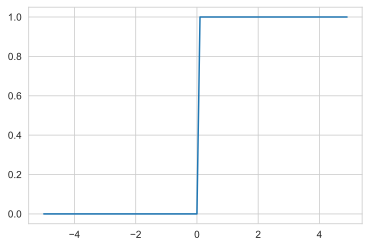

In [2]:
def step_func(x: NDArray[float]) -> NDArray[int]:
    is_positive : NDArray[bool] = x > 0
    y : NDArray[int] = is_positive.astype(int)
    return y

x : NDArray[float] = np.arange(-5.0, 5.0, 0.1)
y : NDArray[int] = step_func(x)
plt.plot(x, y)
plt.show()

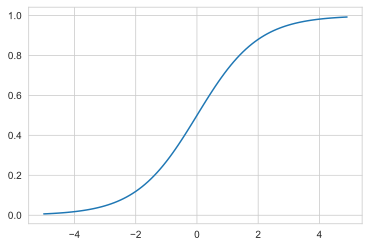

In [3]:
def sigmoid(x: NDArray[float]) -> NDArray[float]:
    return 1 / (1 + np.exp(-x))

x : NDArray[float] = np.arange(-5.0, 5.0, 0.1)
y : NDArray[int] = sigmoid(x)
plt.plot(x, y)
plt.show()

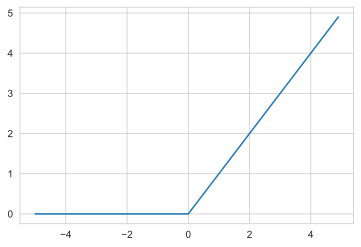

In [4]:
def relu(x: NDArray[float]) -> NDArray[float]:
    return np.maximum(0, x)

x : NDArray[float] = np.arange(-5.0, 5.0, 0.1)
y : NDArray[int] = relu(x)
plt.plot(x, y)
plt.show()

# ニューラルネットワーク

In [5]:
def identity_func(x: NDArray) -> NDArray:
    return x


def init_network() -> Dict[str, NDArray[float]]:
    network : Dict[str, NDArray[float]] = {}
    network['W1'] = np.array([
        [0.1, 0.3, 0.5],
        [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([
        [0.1, 0.4],
        [0.2, 0.5],
        [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([
        [0.1, 0.3],
        [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network


def forward(network: Dict[str, NDArray[float]], x: NDArray[(1, 2), float]) -> NDArray[(1, 2), float]:
    W1 : NDArray[(2, 3), float] = network['W1']
    W2 : NDArray[(3, 2), float] = network['W2']
    W3 : NDArray[(2, 2), float] = network['W3']
    b1 : NDArray[(1, 3), float] = network['b1']
    b2 : NDArray[(1, 2), float] = network['b2']
    b3 : NDArray[(1, 2), float] = network['b3']

    a1 : NDArray[(1 ,3), float] = x @ W1 + b1
    z1 : NDArray[(1, 3), float] = sigmoid(a1)
    a2 : NDArray[(1, 2), float] = z1 @ W2 + b2
    z2 : NDArray[(1, 2), float] = sigmoid(a2)
    a3 : NDArray[(1, 2), float] = z2 @ W3 + b3
    y = identity_func(a3)

    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


In [6]:
def softmax(a: NDArray) -> NDArray:
    c : float = np.max(a)
    return np.exp(a - c) / np.sum(np.exp(a - c))

a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
print(np.sum(y))

[0.01821127 0.24519181 0.73659691]
1.0


# MNISTデータセットを使う

In [15]:
from tensorflow.keras.datasets import mnist


(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape(60000, 784) / 255
test_images = test_images.reshape(10000, 784) / 255

In [24]:
from PIL import Image


def show_image(img):
    pil_img = Image.fromarray(np.uint8(img * 255))
    display(pil_img)


img = train_images[0]
label = train_labels[0]

print(label)
img = img.reshape(28, 28)

show_image(img)

5
